# Analyzing & Visualizing NYC High School Data | Part 2

In this notebook, we'll do analysis and visualizations on the dataset we [previously](Cleaning & Enriching NYC High School Data | Part 1.ipynb) prepared and enriched. 

To download the dataset that we produced from [previous](Cleaning & Enriching NYC High School Data | Part 1.ipynb) notebook [click here](combined.csv). To download the survey data dictionary, [click here](Survey Data Dictionary.xls)

#### Reading the dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_10", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

sat = pd.read_csv("combined.csv")

#### Finding Correlations with "sat_score"

*** Called "R" values as well: "is a measure of the linear dependence between two variables X and Y, giving a value between +1 and −1 inclusive, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation".

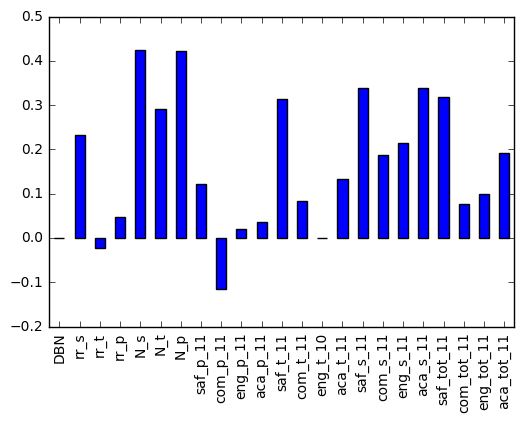

In [2]:
correlations = sat.corr()
corr_sat_score = correlations["sat_score"]

sat.corr()["sat_score"][survey_fields].plot.bar()
plt.show()

Findings of correlations with sat_score:
1. High correlations between N_s (Number of student respondents), N_t (Number of teacher respondents), N_p (Number of parent respondents).
2. rr_s (student response rate) correlates.
3. saf_t_11 and saf_s_11 (students and teachers percieved safety) correlate.
4. aca_s_11 (how the student perceives academic standards) correlates.
5. aca_t_11 (how teachers perceive academic standards) does NOT correlate.
6. aca_p_11 (how parents perceive academic standards) does NOT correlate.


#### Investigating Safety Scores

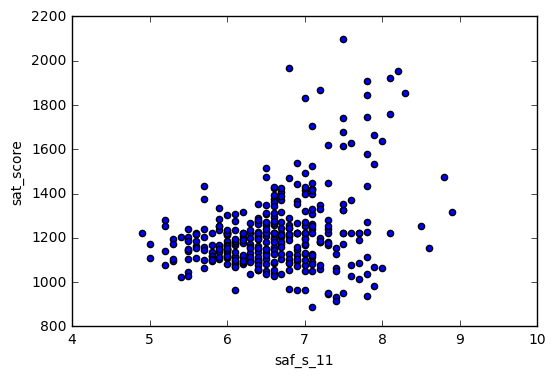

In [3]:
sat.plot.scatter(x="saf_s_11",y="sat_score")
plt.show()

Not that strong correlation between sat scores and safety.

#### Plotting Schools on Map

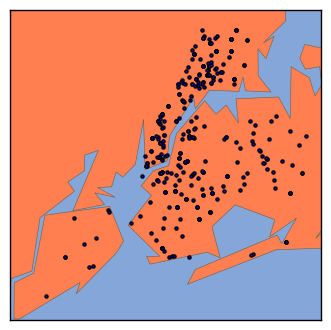

In [4]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47',linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='coral',lake_color='#85A6D9')

longitudes = sat["lon"].tolist()
latitudes = sat["lat"].tolist()
m.scatter(longitudes, latitudes, s=5, zorder=2, latlon=True)
plt.show()

#### Plotting Safety Scores By Disctrict

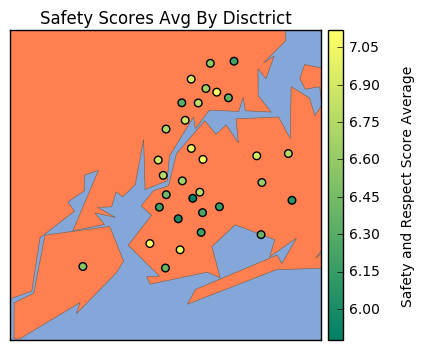

In [5]:
avg_safety = sat.groupby("school_dist").agg(np.mean)

m = Basemap(projection="merc", llcrnrlat=40.496044, urcrnrlat=40.915256, llcrnrlon=-74.255735, urcrnrlon=-73.700272, resolution='i')

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47',linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='coral',lake_color='#85A6D9')

longitudes = avg_safety["lon"].tolist()
latitudes = avg_safety["lat"].tolist()

fig = m.scatter(longitudes,latitudes,s=30,zorder=2,latlon=True,c=avg_safety["saf_s_11"],cmap="summer")
cb = m.colorbar(fig,"right", size="5%", pad="2%")
cb.set_label("Safety and Respect Score Average",labelpad=15)


plt.title("Safety Scores Avg By Disctrict")
plt.show()

Findings:
1. Upper Manhattan and parts of Queens and the Bronx tend to have lower safety scores 
2. Brooklyn has high safety scores.

#### Racial Differences in SAT Scores

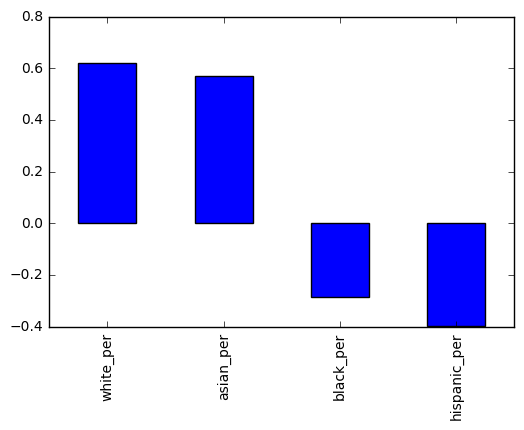

In [6]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
sat.corr()["sat_score"][race_fields].plot.bar()

plt.show()

Findings:
1. Higher percentage of white or asian students at a school correlates positively with sat score
2. higher percentage of black or hispanic students correlates negatively with sat score

#### Schools with Low SAT Scores and a High hispanic_per

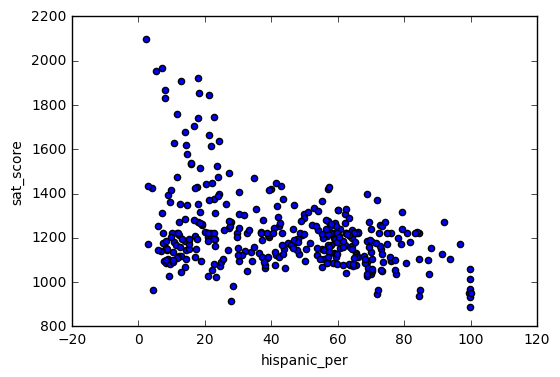

In [7]:
sat.plot.scatter("hispanic_per", "sat_score")
plt.show()

#### Schools with a Greater Than 95% hispanic_per

In [8]:
print(sat[sat["hispanic_per"] > 95]["SCHOOL NAME"])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


#### Schools with a Less Than 10% hispanic_per, and Greater Than 1800 Average SAT Score

In [9]:
print(sat[(sat["hispanic_per"] < 10) & (sat["sat_score"] > 1800)]["SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


#### Gender Differences in SAT Scores

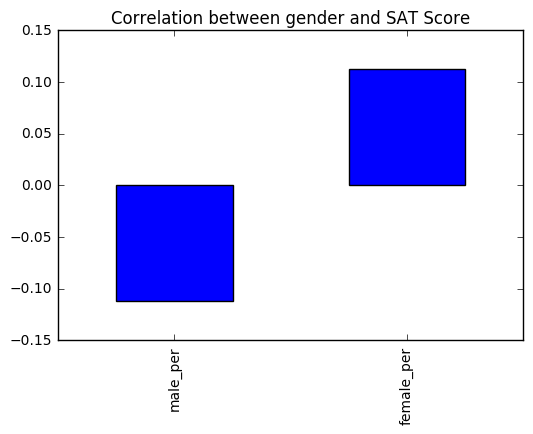

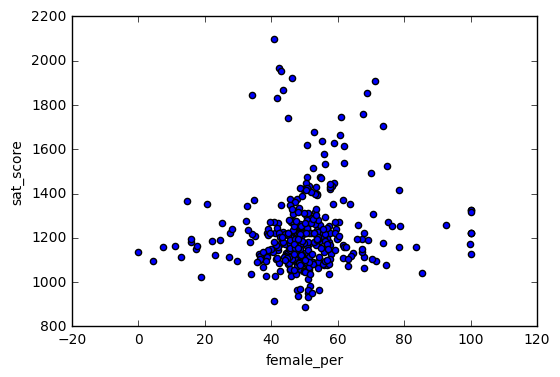

Schools with a high percentage of females (60 to 80), and high SAT scores:
5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [10]:
gender_fields = ["male_per", "female_per"]
sat.corr()["sat_score"][gender_fields].plot.bar()
plt.title("Correlation between gender and SAT Score")
plt.show()

sat.plot.scatter("female_per", "sat_score")
plt.show()

print("Schools with a high percentage of females (60 to 80), and high SAT scores:")
print(sat[(sat["female_per"] > 60) & (sat["sat_score"] > 1700)]["SCHOOL NAME"])

#### AP Exam Scores vs SAT Scores¶

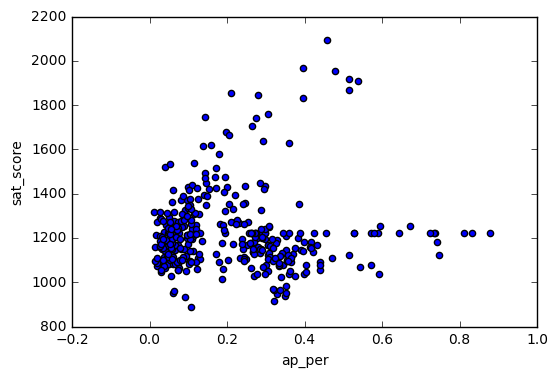

In [11]:
sat["ap_per"] = sat["AP Test Takers "] / sat["total_enrollment"]
sat.plot.scatter(x='ap_per', y='sat_score')
plt.show()

Findings:
- A slightly strong relation between the percentage of students in a school who take the AP exam, and their average SAT scores

#### total_enrollment and sat_score Correlation Plotting

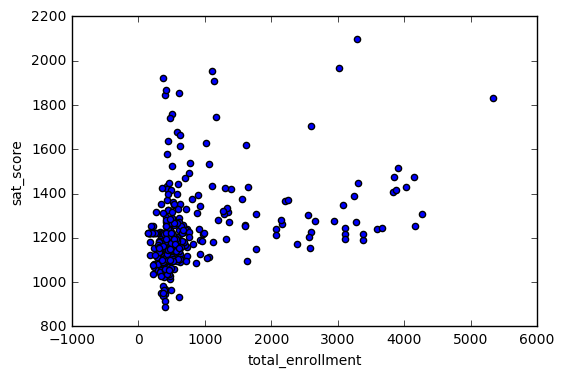

In [12]:
sat.plot.scatter(x="total_enrollment",y="sat_score")

plt.show()

#### Exploring Schools with Low SAT Scores and Enrollment

In [13]:
low_enrollment = sat[sat["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
print(low_enrollment["School Name"])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


Findings:
1. Looks like in the above schools, after doing google research, have a lot of English learners enrolled
2. Leading us to that ell_percent must have better correlation with total_enrollment

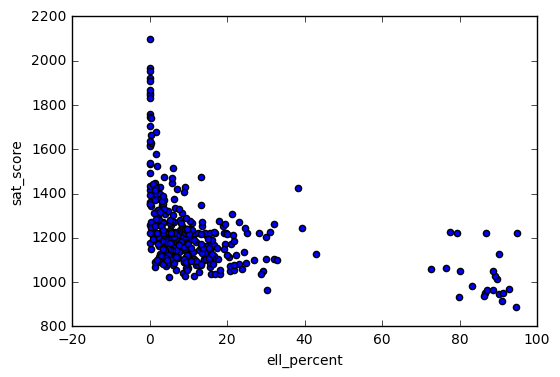

In [14]:
sat.plot.scatter(x="ell_percent",y="sat_score")
plt.show()

It's more liner, hence more correlated, but still there is a cluster which out of group here!

#### Plotting ell_percent (English Language Learners) By District

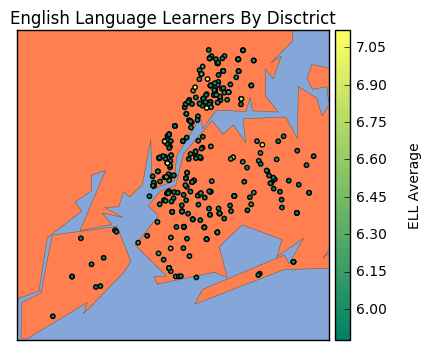

In [15]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47',linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='coral',lake_color='#85A6D9')

longitudes = sat["lon"].tolist()
latitudes = sat["lat"].tolist()
m.scatter(longitudes, latitudes, s=10, zorder=2, latlon=True,c=sat["ell_percent"], cmap="summer")

cb = m.colorbar(fig,"right", size="5%", pad="2%")
cb.set_label("ELL Average",labelpad=15)


plt.title("English Language Learners By Disctrict")

plt.show()

#### Class Size and SAT Scores Correlation

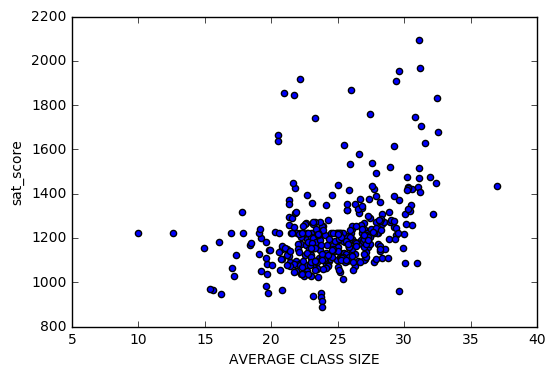

In [16]:
sat.plot.scatter(x="AVERAGE CLASS SIZE",y="sat_score")

plt.show()

---
---
# That's it

Many more questions can be asked, like:
- Figuring out the best area to live in based on school performance.
- Looking into the differences between parent, teacher, and student responses to surveys.
- Assigning a score to schools based on sat_score and other attributes.

Why don't you try it yourself?

Prepared by Issam Hijazi

https://ae.linkedin.com/in/ihijazi

@iHijazi